## Kaggle Credit Card Fraud Dataset

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [44]:
import pandas as pd

df = pd.read_csv("creditcard.csv")

In [45]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [46]:
print(df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [47]:
missing_values = df.isnull().sum()
print(missing_values.sum())


0


## The Time Column
The time column represents the time in seconds elapsed between the row's transaction and the first transaction in the data set. The dataset includes 48 hours of transactions. 

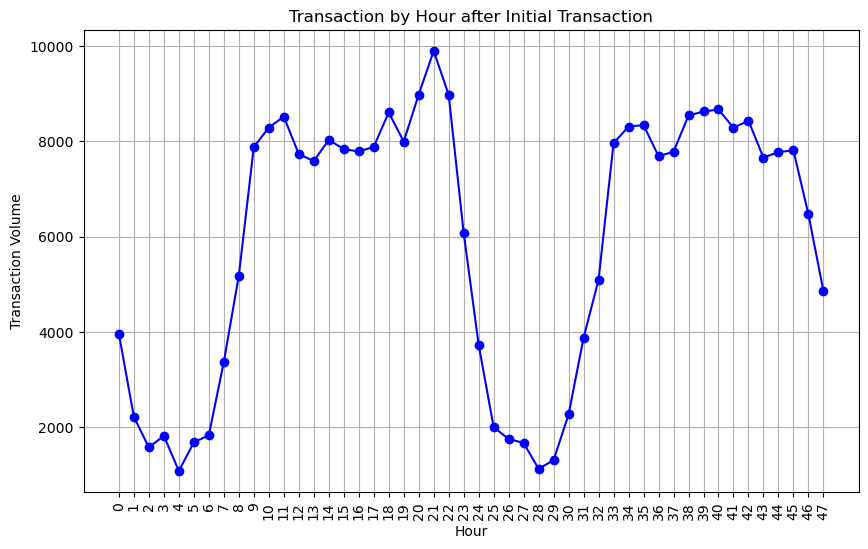

In [98]:
import numpy as np
import matplotlib.pyplot as plt

df['Hour'] = df["Time"] // 3600

# Bin the data into hourly bins
transaction_counts = df['Hour'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.grid(True)

plt.plot(transaction_counts.index, 
         transaction_counts.values, 
         marker='o', 
         linestyle='-', 
         color='b')

plt.title('Transaction by Hour after Initial Transaction')
plt.ylabel('Transaction Volume')
plt.xlabel('Hour')
plt.xticks(range(0, 48, 1),
           rotation = 90)  # Show every hour on the x-axis

plt.show()


## The Amount Column

The `"Amount"` column contains the value of that row's transaction.

In [109]:
df["Amount"].describe(percentiles=[.25, .50, .75, .9, .95, .99, .995, .999]).round(2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
90%         203.00
95%         365.00
99%        1017.97
99.5%      1456.99
99.9%      3000.00
max       25691.16
Name: Amount, dtype: float64

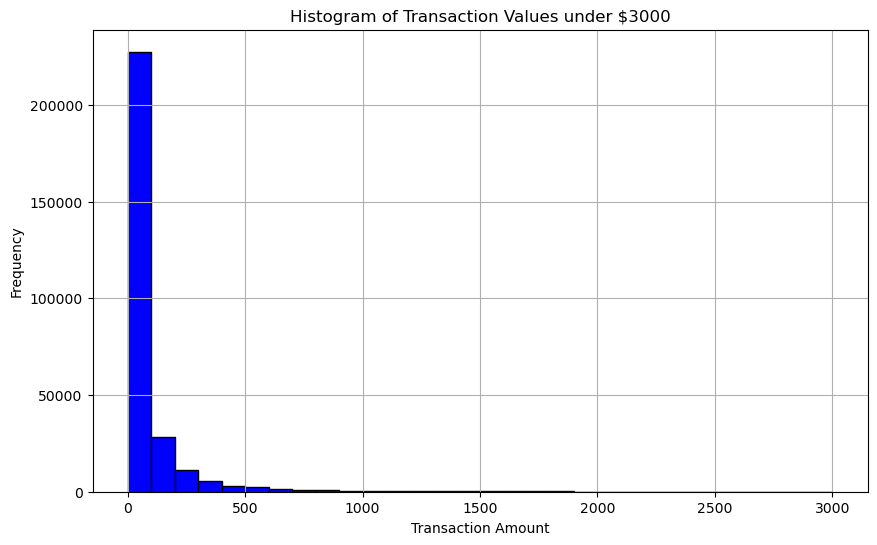

In [121]:
plt.figure(figsize=(10, 6))
plt.grid(True)

df_under_3000 = df[df['Amount'] <= 3000.00]

plt.hist(df_under_3000["Amount"],
         bins = 30,
         color='blue', 
         edgecolor='black')

plt.title('Histogram of Transaction Values under $3000')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.show()

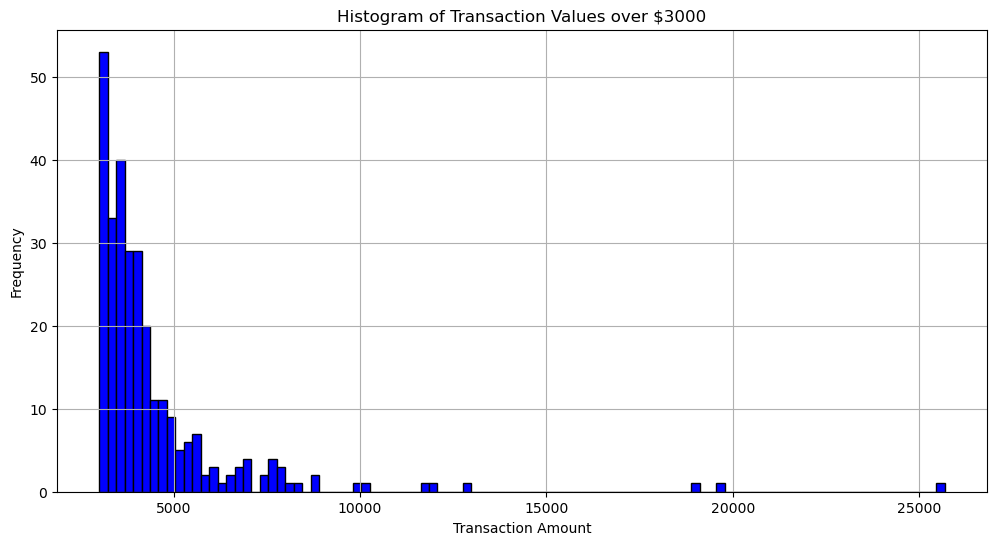

In [131]:
df_over_3000 = df[df['Amount'] >= 3000.00]

plt.figure(figsize=(12, 6))
plt.grid(True)

plt.hist(df_over_3000["Amount"],
         bins = 100,
         color='blue', 
         edgecolor='black')

plt.title('Histogram of Transaction Values over $3000')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.show()

## Exploring the Class Column

The `"Class"` column includes a label as to whether that transaction is fraudulent (`1`) or legitimate (`0`).

In [153]:
class_counts = df["Class"].value_counts()

# (df["Class"] == 1).sum()
percent_fradulent = (df['Class'].sum() / len(df)) * 100

print(f"Legitimate transaction count: {class_counts[0]}")
print(f"Fraudulent transaction count: {class_counts[1]}")
print(f"Fraudlent transaction Percentage: {percent_fradulent:.2f}%") 

Legitimate transaction count: 284315
Fraudulent transaction count: 492
Fraudlent transaction Percentage: 0.17%


## Exploring the V# Columns

In [49]:
v_cols_df = df.drop(["Time", "Amount", "Class"], axis = 1)
v_cols_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [50]:
v_column_summary = v_cols_df.describe().round(2)
v_column_summary

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,...,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,...,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33
min,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,...,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43
25%,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,...,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05
50%,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,...,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01
75%,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,...,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08
max,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,...,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85


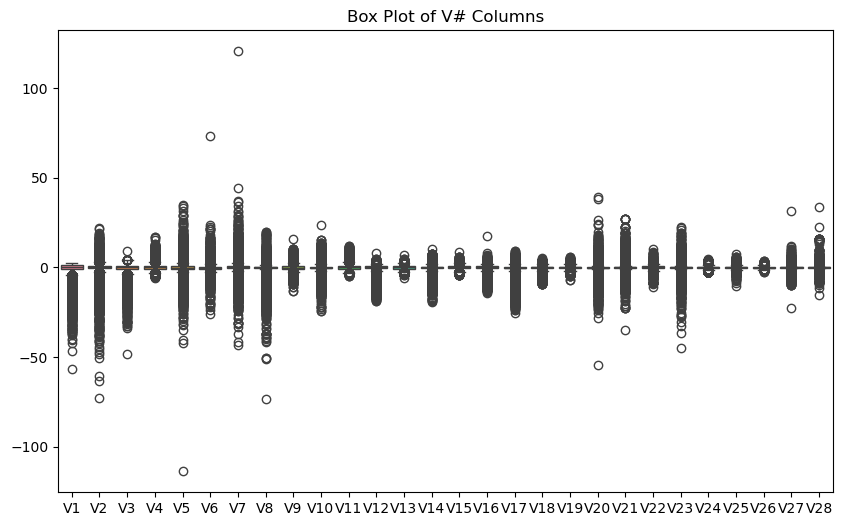

In [51]:
import seaborn as sns

plt.figure(figsize = (10, 6))
sns.boxplot(data = v_cols_df)
plt.title('Box Plot of V# Columns')

plt.show()

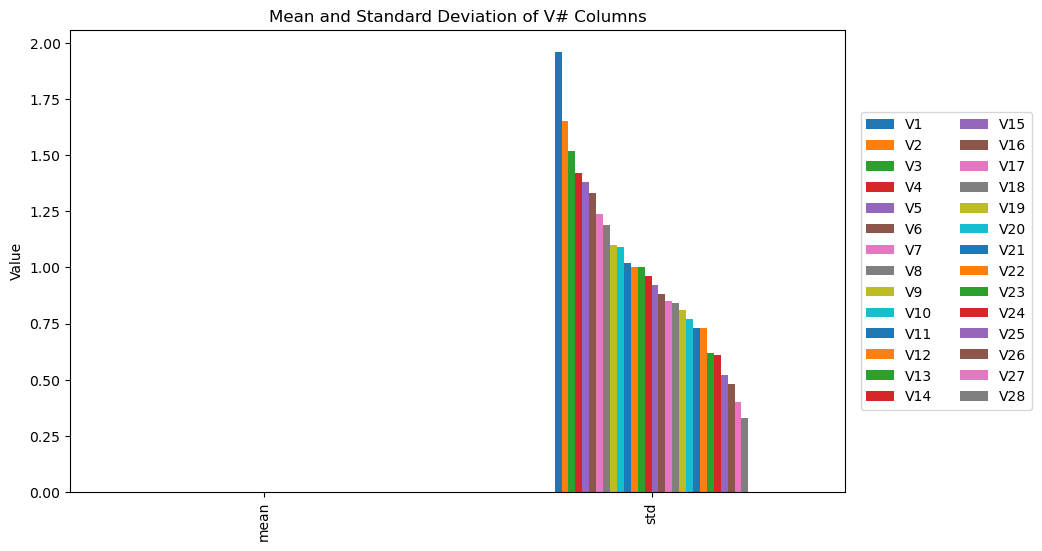

In [52]:
mean_std = v_column_summary.loc[['mean', 'std']]
mean_std.plot(kind='bar', figsize=(10, 6))

plt.title('Mean and Standard Deviation of V# Columns')
plt.ylabel('Value')
plt.legend(loc='right', bbox_to_anchor=(1.25, .5), ncol=2)

plt.show()

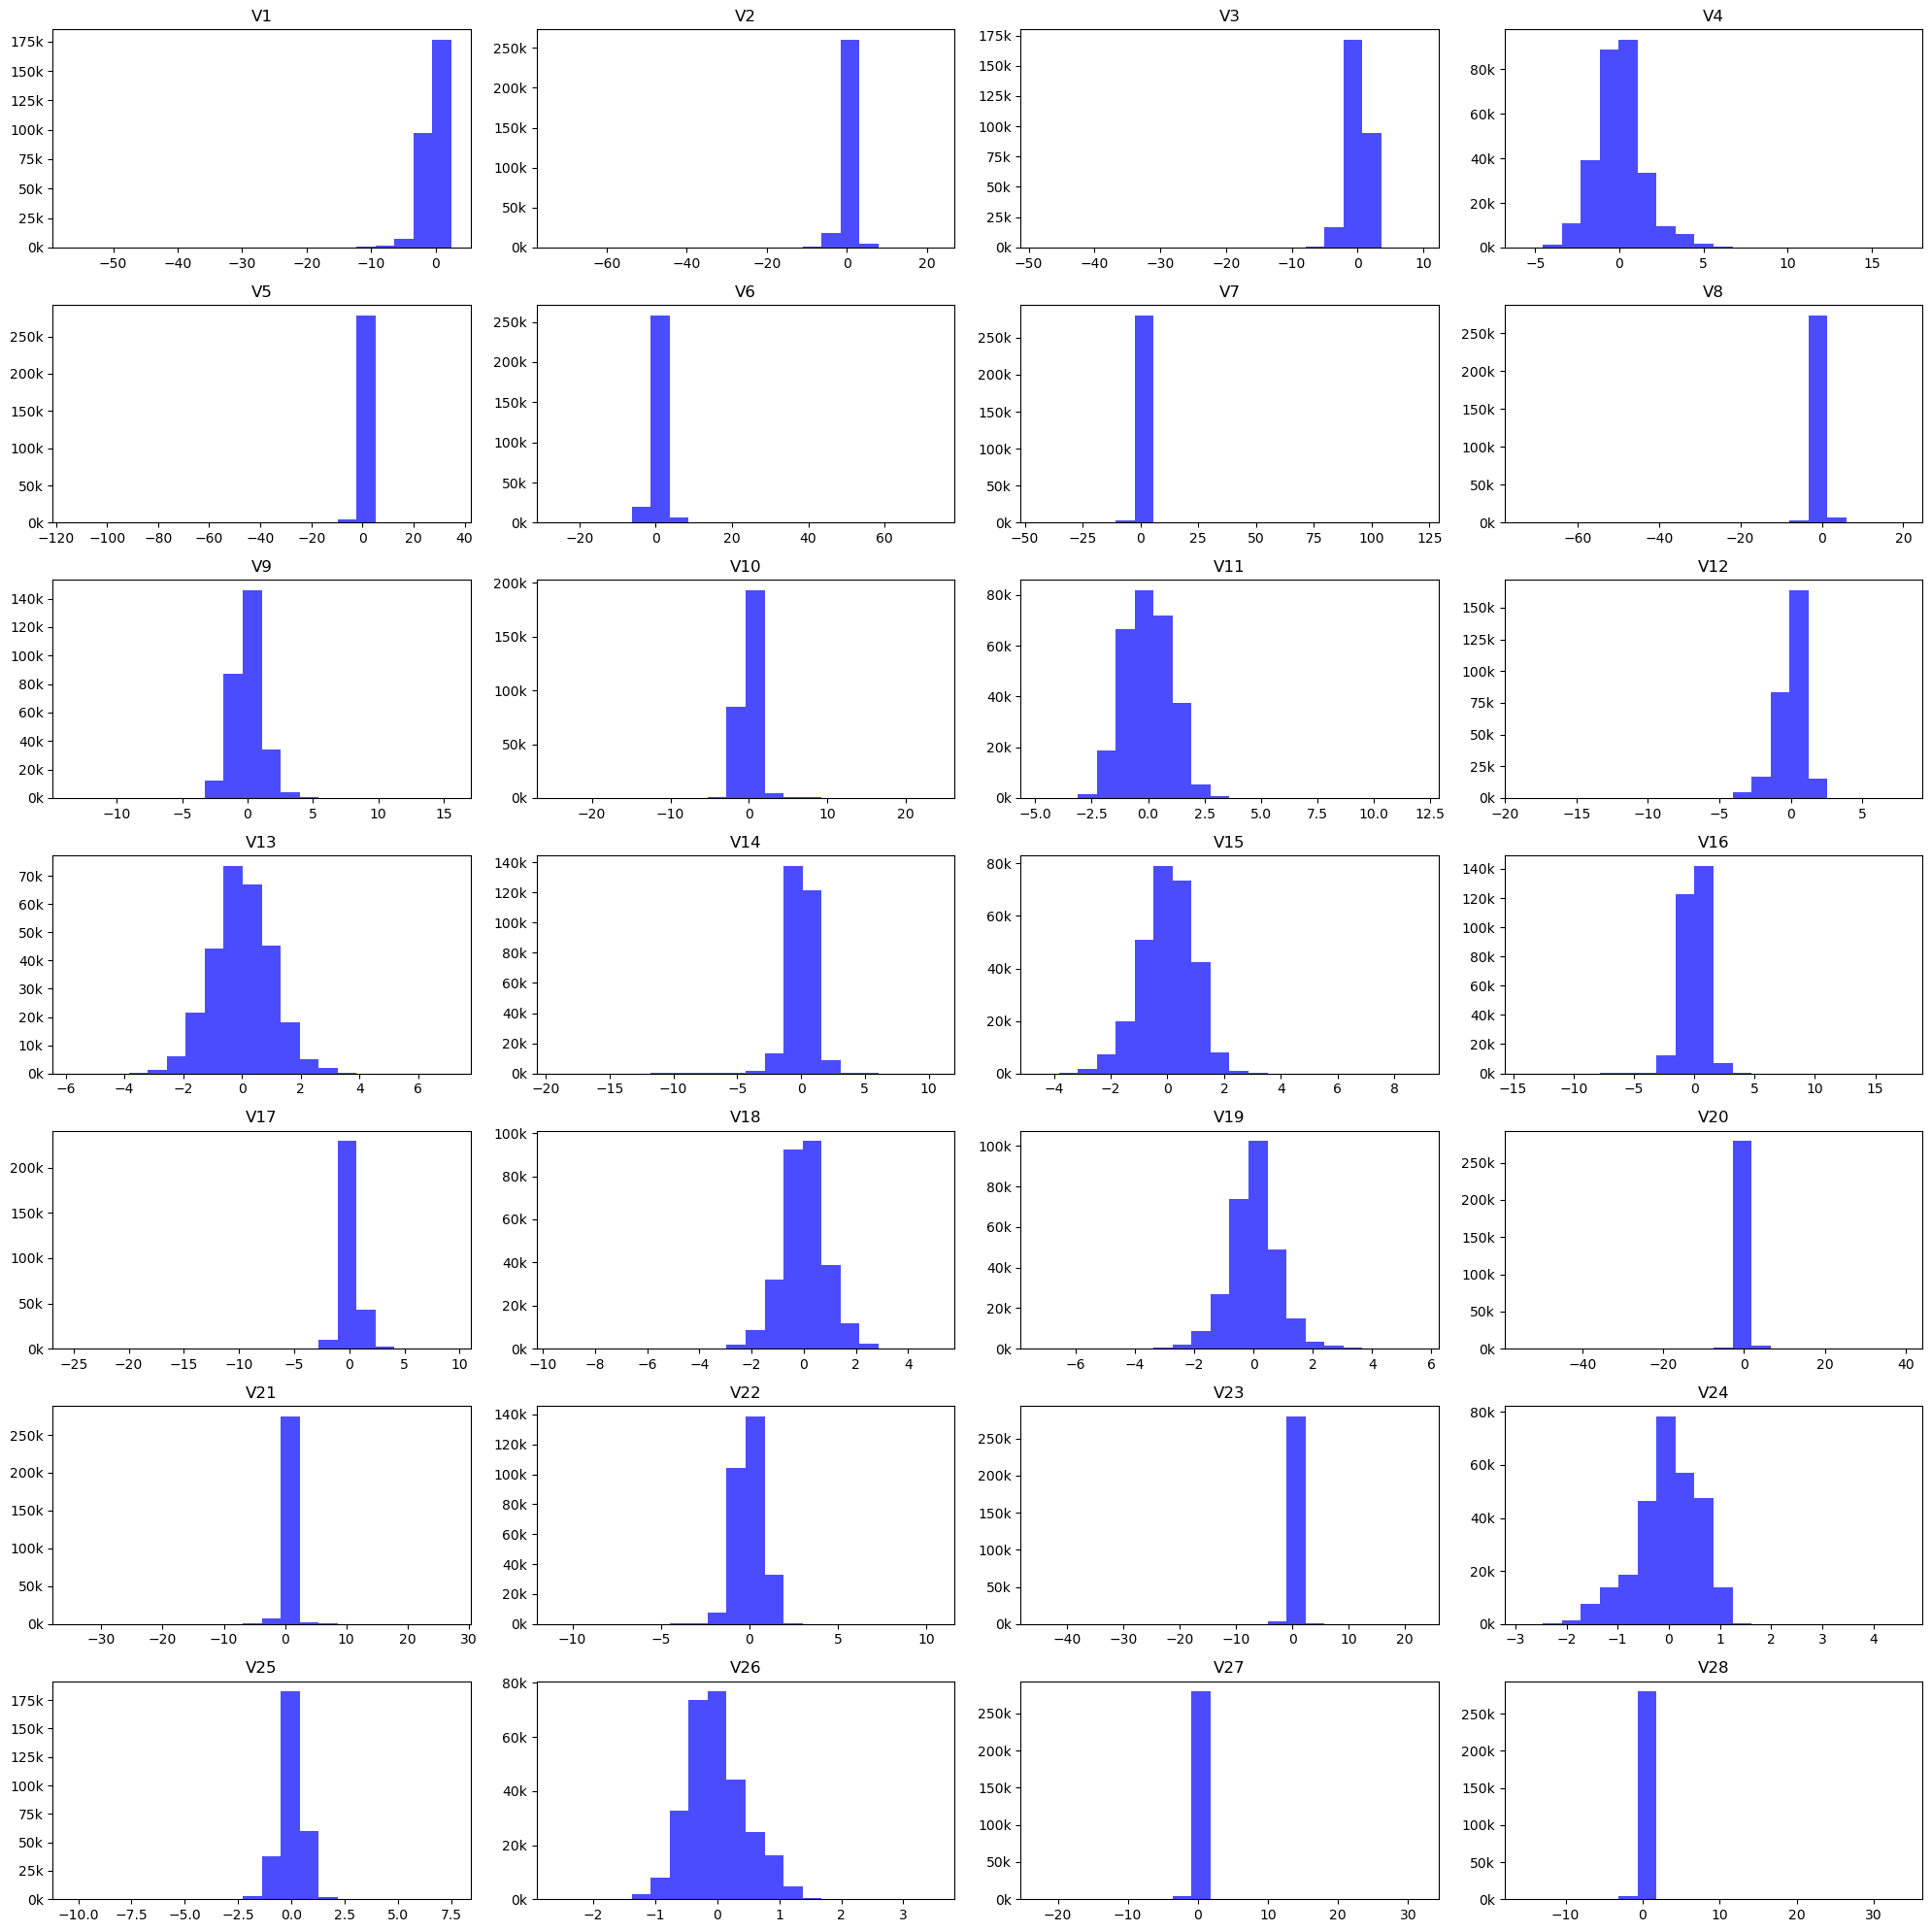

In [58]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Create function to format Y axis value 
from matplotlib.ticker import FuncFormatter

def thousands_formatter(x, pos):
    return f'{int(x/1000)}k'

# Plot histograms for each column
for i, col in enumerate(v_cols_df.columns):
    axes[i].hist(v_cols_df[col], bins=20, color='blue', alpha=0.7)
    axes[i].set_title(col)
    axes[i].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adjust layout
plt.tight_layout()
plt.show()